多維輸出的決策樹，
並取不同深度，來做比較  
https://machine-learning-python.kspax.io/decision_trees/ex2_multi-output_decision_tree_regression
    https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html#sphx-glr-auto-examples-tree-plot-tree-regression-multioutput-py

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
rng = np.random.RandomState(1)# np.random()：隨機產生介於0~1之間的亂數 #RandomState.rand(d0,d1,..,dn)：給定隨機亂數的矩陣形狀 d0*d1*...*dn維度矩陣

In [3]:
X = np.sort(200 * rng.rand(100,1) - 100, axis=0)#產生100個隨機點，這樣設定會落在-100~100之間

In [5]:
y = np.array([np.pi * np.sin(X).ravel(),np.pi * np.cos(X).ravel()]).T#ravel()：輸出連續的一維矩陣。
y[::5,:] += (0.5 - rng.rand(20,2))

## 建立 Decision Tree 迴歸模型

* DecisionTreeRegressor(max_depth = 最大深度)

In [8]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)

In [9]:
regr_1.fit(X,y)
regr_2.fit(X,y)
regr_3.fit(X,y)

DecisionTreeRegressor(max_depth=8)

## 預測
* np.arange(起點, 終點, 間隔)
* np.newaxis 增加矩陣維度/

In [10]:
X_test = np.arange(-100.0,100.0,0.01)[:,np.newaxis]

In [15]:
y_1= regr_1.predict(X_test)
y_2= regr_2.predict(X_test)
y_3= regr_3.predict(X_test)

## 繪出結果
plt.scatter(X,y)：將X、y以點的方式繪製於平面上，c為數據點的顏色，s決定點的大小，label為圖例。

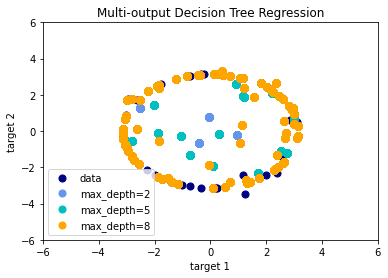

In [17]:
plt.figure()
s = 50
plt.scatter(y[:,0],y[:,1], c="navy", s = s, label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s, label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="c", s=s, label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s, label="max_depth=8")

plt.xlim([-6, 6]) #設定x軸的上下限
plt.ylim([-6, 6]) #設定y軸的上下限

plt.xlabel("target 1") #x軸代表target 1數值
plt.ylabel("target 2") #x軸代表target 2數值

plt.title("Multi-output Decision Tree Regression") #標示圖片的標題
plt.legend() #繪出圖例
plt.show()